In [137]:
import numpy as np 
import matplotlib.pyplot as plt 
%matplotlib inline

In [141]:
class Random:
    def __init__(self, n_arms):
        self.n_arms = n_arms   #number of arms in our multi-arm bandit problem
        self.n_pulls = np.zeros(n_arms)   #notes the number of time a arm is pulled    
        self.rewards_iteration = []
        self.cum_rewards = []
        self.reward_probabilty = [0.01, 1.0, 0.75, 0.99, 0.65, 1.0]
        self.rewards = [5.0, 0.0, 25.5, 10.05, 5.5, .50]

    def pull_arm(self):
        arm = np.random.choice(self.n_arms)
        reward = self.rewards[arm] if np.random.random() < self.reward_probabilty[arm] else 0.0
        self.n_pulls[arm] += 1
        self.rewards_iteration.append(reward)
        self.cum_rewards.append(sum(self.rewards_iteration)/ len(self.rewards_iteration)) 
    
    def run(self, n_steps):
        for t in range(n_steps):
            self.pull_arm()
        return {"arms": self.n_pulls,"cum_rewards": self.cum_rewards}


In [142]:
class SimpleMAB:
    def __init__(self, n_arms, epsilon):
        self.n_arms = n_arms   #number of arms in our multi-arm bandit problem
        self.epsilon = epsilon  #with epsilon probability we choose a random arm and with 1-epsilon ,exploitation will be done 
        self.n_pulls = np.zeros(n_arms)   #notes the number of time a arm is pulled
        self.arm_rewards = np.zeros(n_arms)  #stores total reward for each arm
        self.expected_rewards = np.zeros(n_arms)   #stores expected reward for each arm   
        self.rewards_iteration = []
        self.cum_rewards = []
        self.reward_probabilty = [0.01, 1.0, 0.75, 0.99, 0.65, 1.0]
        self.rewards = [5.0, 0.0, 25.5, 10.05, 5.5, .50]

    def pull_arm(self):
        if np.random.random() < self.epsilon:
            # Exploration: choose a random arm
            arm = np.random.choice(self.n_arms)
        else:
            # Exploitation: choose the arm with highest estimated reward
            arm = np.argmax(self.expected_rewards)

        reward = self.rewards[arm] if np.random.random() < self.reward_probabilty[arm] else 0.0
        self.n_pulls[arm] += 1
        self.arm_rewards[arm] += reward
        self.expected_rewards[arm] = self.arm_rewards[arm]/self.n_pulls[arm]
        self.rewards_iteration.append(reward)
        self.cum_rewards.append(sum(self.rewards_iteration)/ len(self.rewards_iteration))

    
    def run(self, n_steps):
        for t in range(n_steps):
            self.pull_arm()
        return {"arms": self.n_pulls,  "cum_rewards": self.cum_rewards}

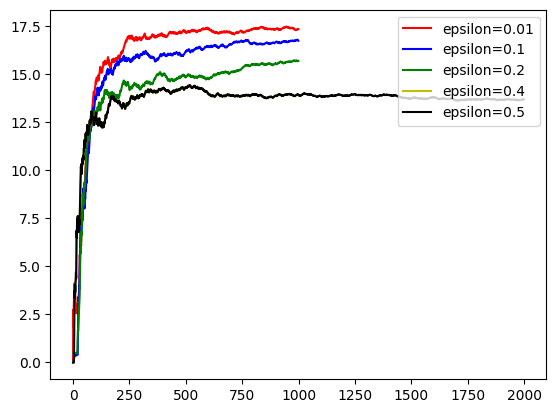

In [143]:
epsilon_greedy1 = SimpleMAB(n_arms=6, epsilon=0.01)
epsilon_greedy_agent1 = epsilon_greedy1.run(n_steps=1000)
plt.plot(epsilon_greedy_agent["cum_rewards"],color='r', label="epsilon=0.01")

epsilon_greedy2 = SimpleMAB(n_arms=6, epsilon=0.1)
epsilon_greedy_agent2 = epsilon_greedy2.run(n_steps=1000)
plt.plot(epsilon_greedy_agent2["cum_rewards"],color='b', label="epsilon=0.1")

epsilon_greedy3 = SimpleMAB(n_arms=6, epsilon=0.2)
epsilon_greedy_agent3 = epsilon_greedy3.run(n_steps=1000)
plt.plot(epsilon_greedy_agent3["cum_rewards"],color='g', label="epsilon=0.2")

epsilon_greedy4 = SimpleMAB(n_arms=6, epsilon=0.4)
epsilon_greedy_agent4 = epsilon_greedy4.run(n_steps=1000)
plt.plot(epsilon_greedy_agent4["cum_rewards"],color='y', label="epsilon=0.4")

epsilon_greedy5 = SimpleMAB(n_arms=6, epsilon=0.5)
epsilon_greedy_agent5 = epsilon_greedy4.run(n_steps=1000)
plt.plot(epsilon_greedy_agent5["cum_rewards"],color='black', label="epsilon=0.5")

plt.legend(loc='upper right')

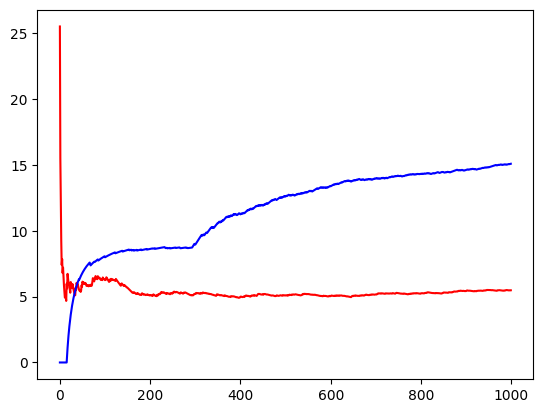

In [144]:
random_agent = Random(n_arms=6)
random_mab = random_agent.run(n_steps=1000)
epsilon_greedy = SimpleMAB(n_arms=6, epsilon=0.1)
epsilon_greedy_agent = epsilon_greedy.run(n_steps=1000)
plt.plot(random_mab["cum_rewards"],color='r', label="avg rewards")
plt.plot(epsilon_greedy_agent["cum_rewards"],color='b', label="avg rewards")

In [147]:
class Softmax:
    def __init__(self, n_arms, tau):
        self.n_arms = n_arms   #number of arms in our multi-arm bandit problem
        self.tau = tau  #with epsilon probability we choose a random arm and with 1-epsilon ,exploitation will be done 
        self.n_pulls = np.zeros(n_arms)   #notes the number of time a arm is pulled
        self.arm_rewards = np.zeros(n_arms)  #stores total reward for each arm
        self.expected_rewards = np.zeros(n_arms)   #stores expected reward for each arm     
        self.rewards_iteration = []
        self.cum_rewards = []
        self.p = np.ones(self.n_arms) / self.n_arms
        self.reward_probabilty = [0.01, 1.0, 0.75, 0.99, 0.65, 1.0]
        self.rewards = [5.0, 0.0, 25.5, 10.05, 5.5, .50]

    def pull_arm(self):
        arm = np.random.choice(self.n_arms, p=self.p)
        reward = self.rewards[arm] if np.random.random() < self.reward_probabilty[arm] else 0.0
        self.n_pulls[arm] += 1
        self.arm_rewards[arm] += reward
        self.expected_rewards[arm] = self.arm_rewards[arm]/self.n_pulls[arm]
        self.rewards_iteration.append(reward)
        self.cum_rewards.append(sum(self.rewards_iteration)/ len(self.rewards_iteration))
        self.p = np.exp(self.expected_rewards / self.tau) / np.sum(np.exp(self.expected_rewards / self.tau))

    
    def run(self, n_steps):
        for t in range(n_steps):
            self.pull_arm()
        return {"arms": self.n_pulls, "cum_rewards": self.cum_rewards}

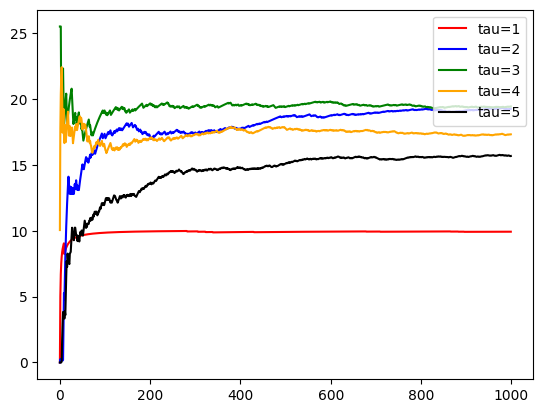

In [161]:
softmax_agent1 = Softmax(n_arms=6, tau=1)
softmax_mab1 = softmax_agent1.run(n_steps=1000)

softmax_agent2 = Softmax(n_arms=6, tau=2)
softmax_mab2 = softmax_agent2.run(n_steps=1000)

softmax_agent3 = Softmax(n_arms=6, tau=3)
softmax_mab3 = softmax_agent3.run(n_steps=1000)

softmax_agent4 = Softmax(n_arms=6, tau=4)
softmax_mab4 = softmax_agent4.run(n_steps=1000)

softmax_agent5 = Softmax(n_arms=6, tau=5)
softmax_mab5 = softmax_agent5.run(n_steps=1000)

plt.plot(softmax_mab1["cum_rewards"],color='r', label="tau=1")
plt.plot(softmax_mab2["cum_rewards"],color='b', label="tau=2")
plt.plot(softmax_mab3["cum_rewards"],color='g', label="tau=3")
plt.plot(softmax_mab4["cum_rewards"],color='orange', label="tau=4")
plt.plot(softmax_mab5["cum_rewards"],color='black', label="tau=5")
plt.legend(loc='upper right')

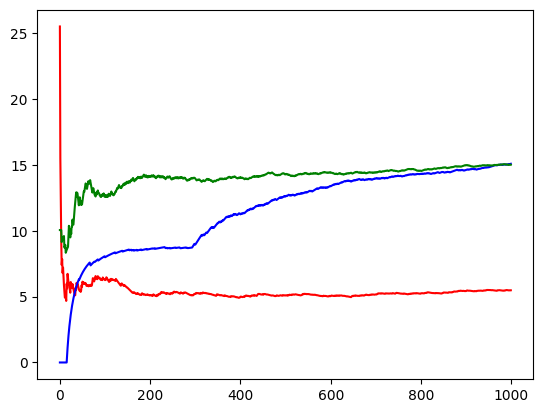

In [162]:
softmax_agent = Softmax(n_arms=6, tau=5.5)
softmax_mab = softmax_agent.run(n_steps=1000)
plt.plot(random_mab["cum_rewards"],color='r', label="avg rewards")
plt.plot(epsilon_greedy_agent["cum_rewards"],color='b', label="avg rewards")
plt.plot(softmax_mab["cum_rewards"],color='g', label="avg rewards")